In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")


Loading DataSet

In [2]:
df = pd.read_csv('training.csv.zip', encoding='latin1',header=None)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


Data Overview

In [3]:
columns=['sentiment','id','date','flag','user','tweet']
df.columns=columns
df.head()

,sentiment,id,date,flag,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   id         1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   flag       1600000 non-null  object
 4   user       1600000 non-null  object
 5   tweet      1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [5]:
df.describe(include='object')

,date,flag,user,tweet
count,1600000,1600000,1600000,1600000
unique,774363,1,659775,1581466
top,Mon Jun 15 12:53:14 PDT 2009,NO_QUERY,lost_dog,isPlayer Has Died! Sorry
freq,20,1600000,549,210


In [6]:
df.shape

(1600000, 6)

In [7]:
df.dtypes

sentiment     int64
id            int64
date         object
flag         object
user         object
tweet        object
dtype: object

In [8]:
df.isnull().sum().sum()

np.int64(0)

In [9]:
df.drop(['id','date','flag','user'],axis=1,inplace=True)

In [10]:
df.head()

,sentiment,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [11]:
df['sentiment'].value_counts()

sentiment
0    800000
4    800000
Name: count, dtype: int64

In [12]:
df['sentiment'] = df['sentiment'].map({4:1, 0:0})


In [13]:
df.head()

,sentiment,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [14]:
df['sentiment'].value_counts()

sentiment
0    800000
1    800000
Name: count, dtype: int64

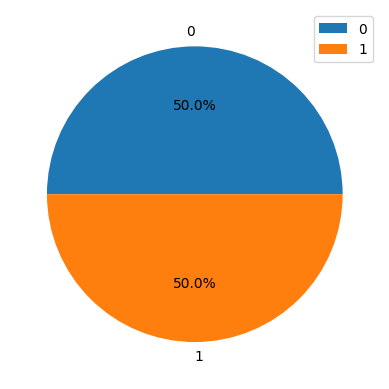

In [15]:
plt.pie(df['sentiment'].value_counts(),labels=df['sentiment'].value_counts().index,autopct='%1.1f%%')
plt.legend(labels=df["sentiment"].value_counts().index)
plt.show()

PreProcessing Text

In [16]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [16]:
#!pip install nltk

import nltk
from nltk.stem import PorterStemmer


In [18]:
import spacy
nlp=spacy.load("en_core_web_sm")

In [31]:
import re
import spacy
from nltk.stem import PorterStemmer

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    # Remove punctuation and digits
    text = re.sub(r"[^\w\s]|[\d]", "", text)
    
    # Remove mentions and hashtags
    text = re.sub(r"@\w+|#", "", text)
    
    # Remove URLs
    text = re.sub(r"https?://\S+", "", text)
    
    # Strip whitespace and lowercase
    text = text.strip().lower()
    
    # Step 1: spaCy tokenization + stopword removal
    doc = nlp(text)
    filtered_tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    
    # Step 2: Apply stemming to the filtered tokens
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    
    return " ".join(stemmed_tokens)


In [ ]:
df['clean_tweet']=df['tweet'].apply(preprocess)

In [37]:
df.head()

,sentiment,tweet,clean_tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot httptwitpiccomyzl awww s bummer ...
1,0,is upset that he can't update his Facebook by ...,upset not updat facebook text cri result sch...
2,0,@Kenichan I dived many times for the ball. Man...,kenichan dive time ball manag save rest bound
3,0,my whole body feels itchy and like its on fire,bodi feel itchi like fire
4,0,"@nationwideclass no, it's not behaving at all....",nationwideclass behav m mad not


In [39]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


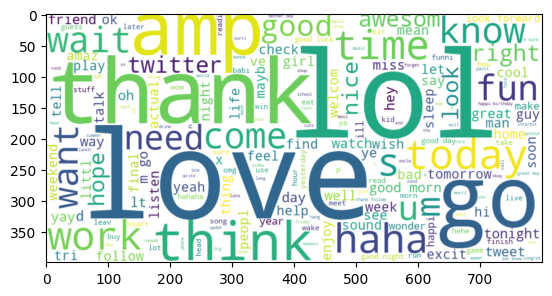

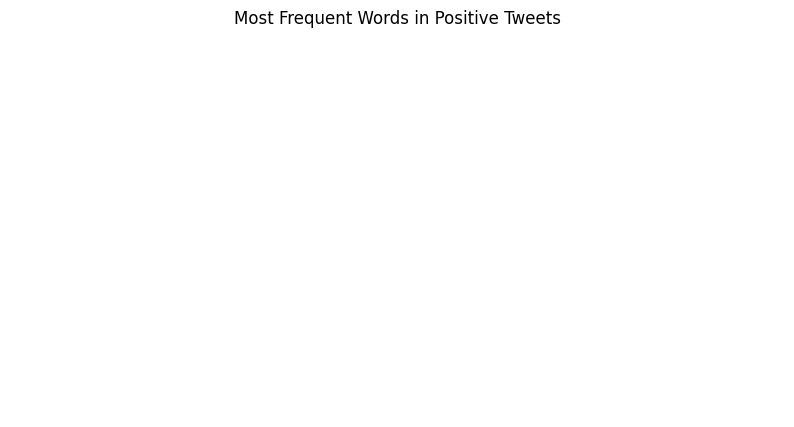

In [42]:
from wordcloud import WordCloud
positive_words=" ".join(df[df['sentiment']==1]['clean_tweet'])
negative_words=" ".join(df[df['sentiment']==0]['clean_tweet'])
wordcloud=WordCloud(width=800,height=400,background_color="white").generate(positive_words)
plt.imshow(wordcloud,interpolation='bilinear')
plt.figure(figsize=(10,5))
plt.axis("off")
plt.title("Most Frequent Words in Positive Tweets")
plt.show()

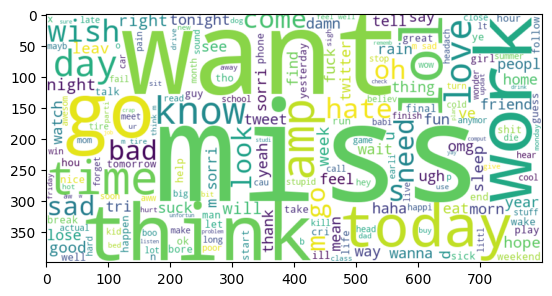

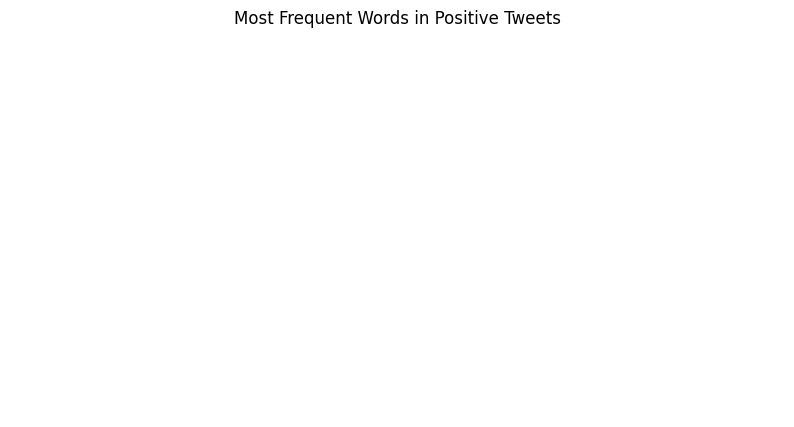

In [48]:
wordcloud=WordCloud(width=800,height=400,background_color="white").generate(negative_words)
plt.imshow(wordcloud,interpolation='bilinear')
plt.figure(figsize=(10,5))
plt.axis("off")
plt.title("Most Frequent Words in Positive Tweets")
plt.show()

In [45]:
#checking for tweets with 0 length
df['tweet_len']=df['clean_tweet'].apply(lambda clean_tweet : len(clean_tweet.split()))


In [47]:
df.head()

,sentiment,tweet,clean_tweet,tweet_len
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot httptwitpiccomyzl awww s bummer ...,11
1,0,is upset that he can't update his Facebook by ...,upset not updat facebook text cri result sch...,10
2,0,@Kenichan I dived many times for the ball. Man...,kenichan dive time ball manag save rest bound,8
3,0,my whole body feels itchy and like its on fire,bodi feel itchi like fire,5
4,0,"@nationwideclass no, it's not behaving at all....",nationwideclass behav m mad not,5


In [56]:
zero_len = df[df["tweet_len"]==0][["tweet" ,"clean_tweet","tweet_len"]]
display(zero_len.shape)
zero_len.head()

(1172, 3)

,tweet,clean_tweet,tweet_len
356,last one!!! but still not done!!!,,0
3997,what to do,,0
4233,just,,0
5804,and then there was one (me),,0
6052,where is everyone,,0


In [59]:
df=df[df['tweet_len']!=0].reset_index(drop=True)
df = df.drop_duplicates(subset='clean_tweet', keep='first')
print(df.shape)

(1541878, 4)


Splitting the dataset and Feature Engineering

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

X_train,X_test,y_train,y_test=train_test_split(df['clean_tweet'],df['sentiment'],test_size=0.2,random_state=42)
vectorizer=TfidfVectorizer(ngram_range=(1,2),max_features=100000)
X_train_vec=vectorizer.fit_transform(X_train)
X_test_vec=vectorizer.transform(X_test)


In [67]:
print("no of entries in train data",X_train_vec.shape[0])
print("no of entries in test data",X_test_vec.shape[0])


no of entries in train data 1233502
no of entries in test data 308376


Creating and Evaluating Models

In [68]:
#function to evaluate metrics
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
def metrics_evaluation(model,predictors,target):
    #predicting values of  data
    y_pred=model.predict(predictors)
    #metrics evaluation
    f1=f1_score(target,y_pred)
    recall=recall_score(target,y_pred)
    precision=precision_score(target,y_pred)
    accuracy=accuracy_score(target,y_pred)
    
    perf=pd.DataFrame({
        'Accuracy':accuracy,
        'Precision':precision,
        'Recall': recall,
        'f1_score':f1},index=[0])
    return perf

In [69]:
from sklearn.metrics import confusion_matrix
#function for confusion matrix
def confusion_mat(model,predictors,target):
    #predicting values of data
    y_pred=model.predict(predictors)

    #confusion matrix
    cm=confusion_matrix(target,y_pred)

    labels=np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2,2)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm,annot=labels,fmt="")
    plt.xlabel("Predicted values")
    plt.ylabel("True values")
    plt.show()
    

Data modelling with logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression

lr_model=LogisticRegression(max_iter=1000,n_jobs=-1)
lr_model.fit(X_train_vec,y_train)


In [72]:
lr_train=metrics_evaluation(lr_model,X_train_vec,y_train)
lr_train

,Accuracy,Precision,Recall,f1_score
0,0.800782,0.788997,0.824269,0.806248


In [71]:
lr_test=metrics_evaluation(lr_model,X_test_vec,y_test)
lr_test

,Accuracy,Precision,Recall,f1_score
0,0.782094,0.771822,0.806016,0.788548


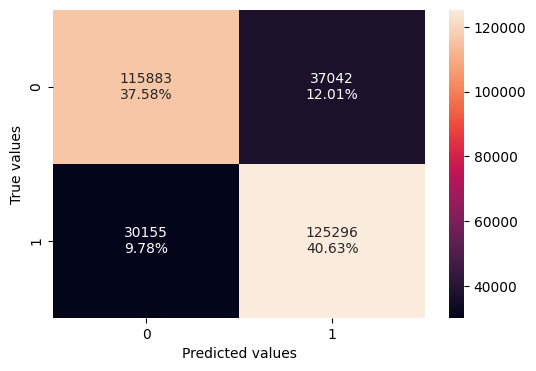

In [74]:
confusion_mat(lr_model,X_test_vec,y_test)

Data modelling with Bernoulli Naive Bayes

In [75]:
from sklearn.naive_bayes import BernoulliNB

nb_model=BernoulliNB()
nb_model.fit(X_train_vec,y_train)

BernoulliNB()

In [78]:
nb_train=metrics_evaluation(nb_model,X_train_vec,y_train)
nb_train

,Accuracy,Precision,Recall,f1_score
0,0.783823,0.76975,0.813423,0.790984


In [77]:
nb_test=metrics_evaluation(nb_model,X_test_vec,y_test)
nb_test

,Accuracy,Precision,Recall,f1_score
0,0.767835,0.755339,0.797885,0.776029


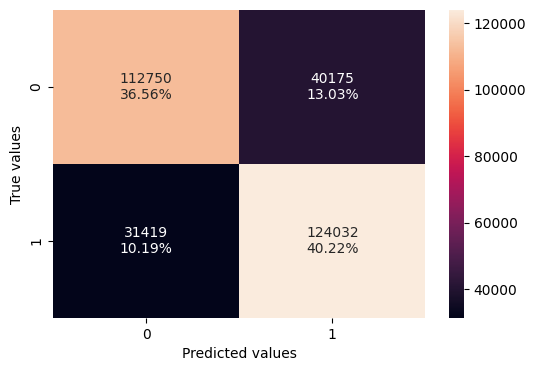

In [79]:
confusion_mat(nb_model,X_test_vec,y_test)

In [1]:
import nbconvert

In [3]:
!jupyter nbconvert twitter_Sentiment_NLP.ipynb --to HTML


[NbConvertApp] Converting notebook twitter_Sentiment_NLP.ipynb to HTML
[NbConvertApp] WARNING | Alternative text is missing on 7 image(s).
[NbConvertApp] Writing 888402 bytes to twitter_Sentiment_NLP.html
